In [ ]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show the python code used for calculations</button>''', raw=True)

# Some observation about hv scans at i05
When performing an hv scan, one can observe that the Fermi level is not scaling in the same way as the photon energy. To quantify this effect, I extracted the kinetic energy for electrons at the Fermi level for a few cuts:

In [2]:
%matplotlib inline

,0,1,2,3,4,5
set photon energy (eV),108.00,92.00,88.00,66.00,46.00,30.000
measured E_kin(eV)@E_f,103.06,87.19,83.22,61.38,41.51,25.586


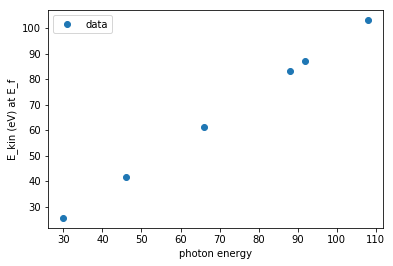

In [3]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import HTML, display
photon_energy = np.array([108,92,88,66,46,30])
Ekin_at_Ef = np.array([103.06,87.19,83.22,61.38,41.51,25.586])
table_array=np.stack((photon_energy,Ekin_at_Ef))
header=['set photon energy (eV)','measured E_kin(eV)@E_f']
df = pd.DataFrame(table_array, index=header)
html = df.to_html()
display(HTML(html))

plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.xlabel('photon energy');
plt.ylabel('E_kin (eV) at E_f');
plt.legend();


From a linear fitting to this curve (weighted for datapoint at high photon energy, since we want to keep the Fermi level at the original value)
$$
f(x)= ax+b
$$
we can obtain the fitting constants. The residuals are of the order max ~30 meV.



,0,1,2,3,4,5
set photon energy (eV),108.000000,92.000000,88.000000,66.000000,46.000000,30.000000
measured E_kin (eV)@E_f,103.060000,87.190000,83.220000,61.380000,41.510000,25.586000
interpolated E_kin (eV)@E_f,103.060004,87.173573,83.201966,61.358123,41.500085,25.613655
residuals (eV),-0.000004,0.016427,0.018034,0.021877,0.009915,-0.027655


('a=', 0.99290191456555732)
('b=', -4.1734029132721977)


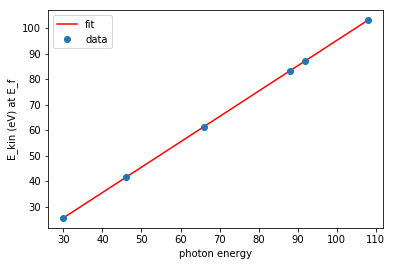

In [11]:
def linear_funct2(x, a, b):
    return (a * x) + b
sig=[0.01, 1, 1, 1, 1, 1];

popt2, pcov = curve_fit(linear_funct2, photon_energy, Ekin_at_Ef,sigma=sig);
plt.plot(photon_energy, linear_funct2(photon_energy, *popt2), 'r-', label='fit');

interpolated_Ef=linear_funct2(photon_energy,*popt2);
residuals=Ekin_at_Ef-interpolated_Ef;
table_array=np.stack((photon_energy,Ekin_at_Ef,interpolated_Ef,residuals))
header=['set photon energy (eV)','measured E_kin (eV)@E_f','interpolated E_kin (eV)@E_f','residuals (eV)']
df = pd.DataFrame(table_array, index=header)
html = df.to_html()
display(HTML(html))

print('a=', popt2[0])
print('b=', popt2[1])


plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.xlabel('photon energy');
plt.ylabel('E_kin (eV) at E_f');
plt.legend();

it turns out that the residuals can be reduced by almost an oder of magnitude when applying a quadratic fit function

,0,1,2,3,4,5
set photon energy (eV),1.080000e+02,92.000000,88.000000,66.000000,46.000000,30.000000
measured E_kin (eV)@E_f,1.030600e+02,87.190000,83.220000,61.380000,41.510000,25.586000
interpolated E_kin (eV)@E_f,1.030600e+02,87.191835,83.222919,61.380476,41.504026,25.589367
residuals (eV),2.623221e-07,-0.001835,-0.002919,-0.000476,0.005974,-0.003367


('a=', -2.3434278588000829e-05)
('b=', 0.99644716653107002)
('c=', -4.2829568222272272)


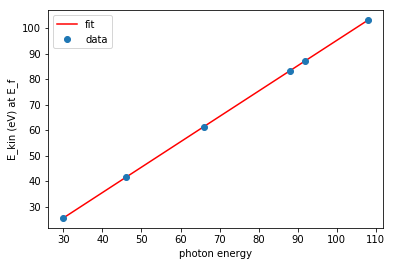

In [13]:
def parabolic_func(x, a, b, c):
    return a * x**2 + b*x + c
sig=[0.01, 1, 1, 1, 1, 1];
popt3, pcov = curve_fit(parabolic_func, photon_energy, Ekin_at_Ef,sigma=sig);
plt.plot(photon_energy, parabolic_func(photon_energy, *popt3), 'r-', label='fit');

interpolated_Ef=parabolic_func(photon_energy,*popt3);
residuals=Ekin_at_Ef-interpolated_Ef;
table_array=np.stack((photon_energy,Ekin_at_Ef,interpolated_Ef,residuals))
header=['set photon energy (eV)','measured E_kin (eV)@E_f','interpolated E_kin (eV)@E_f','residuals (eV)']
df = pd.DataFrame(table_array, index=header)
html = df.to_html()
display(HTML(html))
print('a=',popt3[0])
print('b=',popt3[1])
print('c=',popt3[2])


plt.plot(photon_energy, Ekin_at_Ef,'o', label='data');
plt.xlabel('photon energy');
plt.ylabel('E_kin (eV) at E_f');
plt.legend();

However, more datapoints are needed to confirm that the quadratic scaling is indeed superior